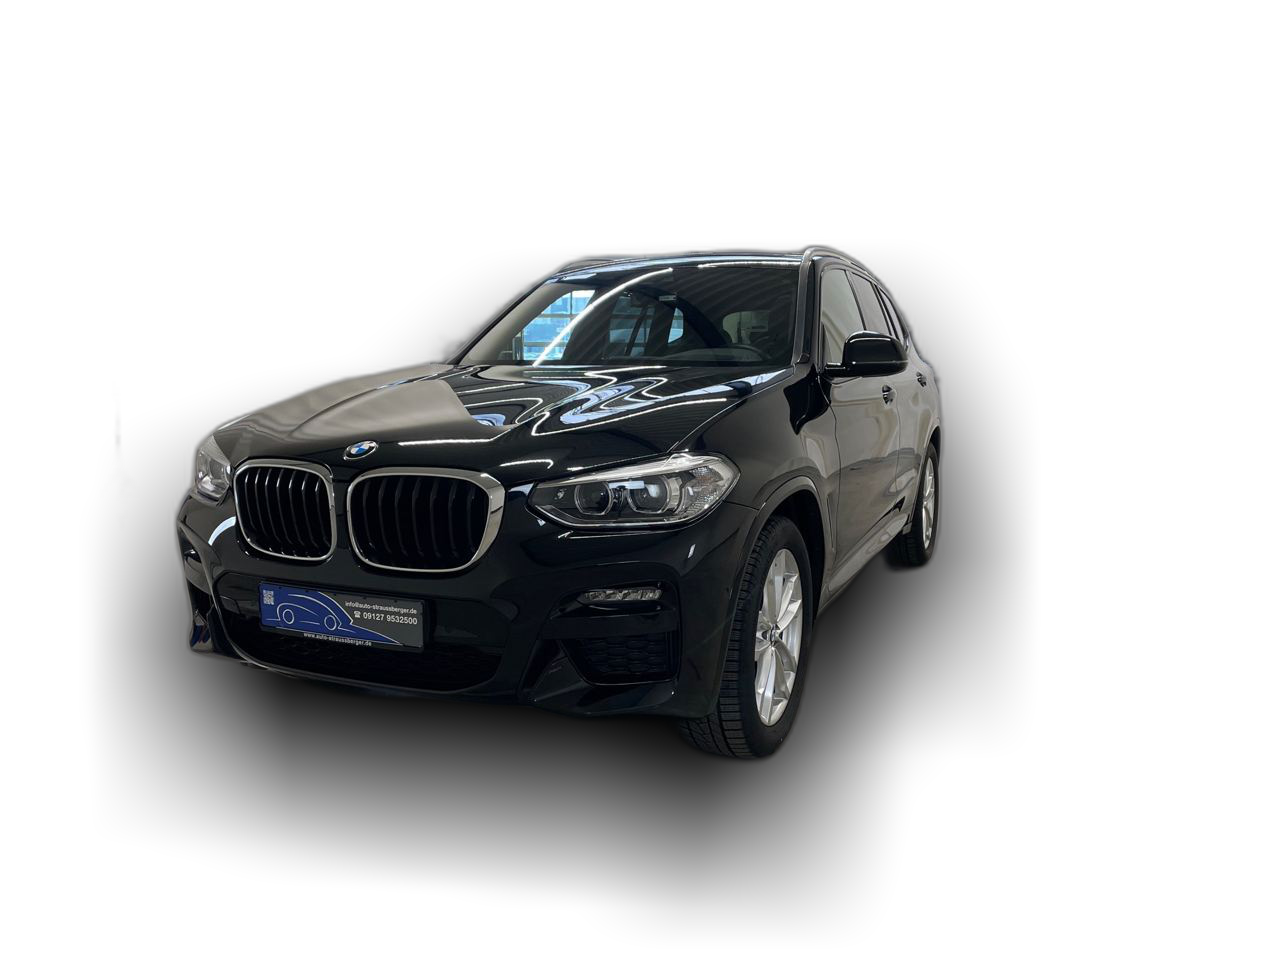

In [45]:
!pip install rembg

# Importing the necessary libraries
from rembg import remove
from PIL import ImageOps, Image, ImageFilter

# 1/ Specifying the working paths
input_path = "photo1.jpg" # photo to be processed (extracdtion of a subject from existing background)
out_path = "result_1_.png" # name of a new photo without background


# 2/ Removing the background and saving the image
input = Image.open(input_path)
remove_bgnd = remove(input)
remove_bgnd.save(out_path)

# 3/ Creating shadow on the background photo and merging it with the subject
FG_IMG_PATH = "result_1_.png"
BG_IMG_PATH = "white_1.jpg"

fg = Image.open(FG_IMG_PATH)
bg = Image.open(BG_IMG_PATH)

alpha = fg.split()[-1]
alpha_blur = alpha.filter(ImageFilter.BoxBlur(100))

shadow = Image.new(mode="RGB", size=alpha_blur.size)
shadow.putalpha(alpha_blur)

bg.paste(shadow, (0, 90), shadow)
bg.paste(fg, (0,0), fg)

bg